In [2]:
import pandas as pd

df=pd.read_excel("60 günlük veriler.xlsx")
df.head()


,Doküman,Analiz Tarihi,Numune Adı,NaHCO3 (%),Na2CO3 (%),Cl- (mg/kg),SO42-(mg/kg),SÇM (mg/kg),Yığın Yoğunluğu (g/cm3),Tane Boyutu m250µm(g) Ortalama,Nem (%)
0,NaN,30.10.2025,SODYUM BİKARBONAT,49.7708,0.1064,108.1835,130.2962,195.0000,1.0863,3.75,0.010
1,NaN,29.10.2025,SODYUM BİKARBONAT,99.7079,0.1025,169.3578,289.3724,484.9250,1.1618,7.25,0.015
2,NaN,28.10.2025,SODYUM BİKARBONAT,99.7201,0.1033,125.0054,211.1571,489.9094,1.1954,11.55,0.025
3,NaN,27.10.2025,SODYUM BİKARBONAT,99.7504,0.0880,75.3737,286.6496,485.0000,1.1945,7.55,0.025
4,NaN,26.10.2025,SODYUM BİKARBONAT,99.7115,0.1468,90.4252,290.7643,479.8345,1.1483,5.45,0.005


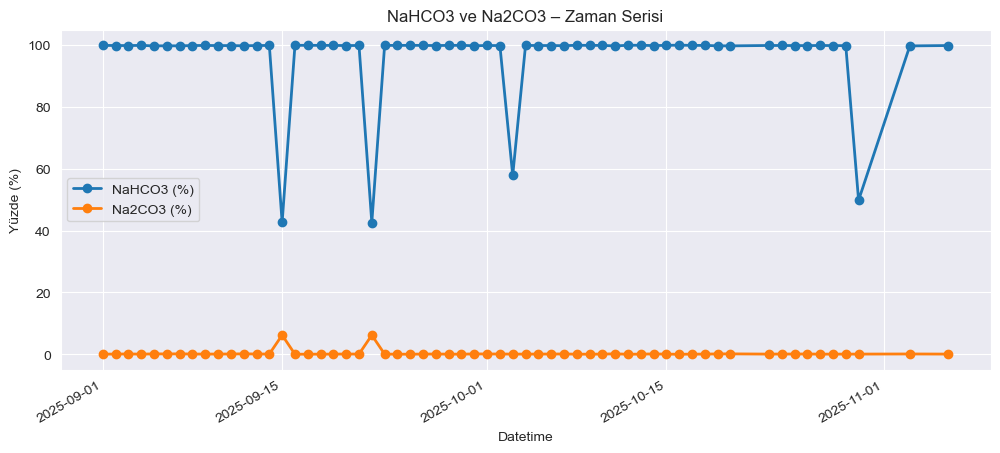

In [23]:
df["Datetime"] = pd.to_datetime(df["Analiz Tarihi"], dayfirst=True)

df.set_index("Datetime")[["NaHCO3 (%)", "Na2CO3 (%)"]].plot(
    figsize=(12,5),
    marker="o",
    linewidth=2
)
plt.title("NaHCO3 ve Na2CO3 – Zaman Serisi")
plt.ylabel("Yüzde (%)")
plt.grid(True)
plt.show()


In [26]:
impute_dates = pd.to_datetime(
    ["2025-09-15", "2025-09-22", "2025-10-03", "2025-10-30"]
)


In [29]:
import plotly.express as px

fig = px.line(
    df,
    x="Datetime",
    y="NaHCO3 (%)",
    markers=True,
    title="NaHCO3 (%) – İmputation Sonrası Canlı Zaman Serisi"
)

fig.update_layout(
    hovermode="x unified"
)

fig.show()


In [38]:
import pandas as pd
import numpy as np
import plotly.express as px

# Excel oku
df = pd.read_excel("60 günlük veriler.xlsx")
df.columns = df.columns.str.strip()

# Datetime
df["Datetime"] = pd.to_datetime(df["Analiz Tarihi"], dayfirst=True)
df = df.sort_values("Datetime").reset_index(drop=True)

# İmpute edilecek tarihler
impute_dates = pd.to_datetime([
    "2025-09-15",
    "2025-09-22",
    "2025-10-03",
    "2025-10-30"
])

# 1️⃣ Önce BU günleri NaN yap (kritik adım)
df.loc[df["Datetime"].isin(impute_dates), "NaHCO3 (%)"] = np.nan

# 2️⃣ Sonra ±3 gün penceresinden SADECE sağlam günlerle doldur
for d in impute_dates:
    idx = df.index[df["Datetime"] == d]
    if len(idx) == 0:
        continue

    i = idx[0]
    start = max(i - 3, 0)
    end = min(i + 4, len(df))

    local_mean = df.loc[start:end, "NaHCO3 (%)"].mean(skipna=True)
    df.loc[i, "NaHCO3 (%)"] = local_mean

# 3️⃣ Proses bandı (artık güvenle)
df["NaHCO3 (%)"] = df["NaHCO3 (%)"].clip(99.4, 100)

# Kontrol
print(df[df["Datetime"].isin(impute_dates)][["Datetime", "NaHCO3 (%)"]])

# Canlı grafik
fig = px.line(
    df,
    x="Datetime",
    y="NaHCO3 (%)",
    markers=True,
    title="NaHCO3 (%) – DOĞRU Zaman Bazlı İmputation Sonrası"
)
fig.update_layout(hovermode="x unified")
fig.show()


     Datetime  NaHCO3 (%)
14 2025-09-15   99.760343
21 2025-09-22   99.769171
32 2025-10-03   99.723257
57 2025-10-30   99.704960


In [39]:
# -------------------------------------------------
# 8️⃣ Na2CO3 (%) – Zaman Bazlı İmputation
#     (NaHCO3 ile AYNI günler)
# -------------------------------------------------

# 1️⃣ Önce impute edilecek günleri NaN yap
df.loc[df["Datetime"].isin(impute_dates), "Na2CO3 (%)"] = np.nan

# 2️⃣ ±3 gün penceresinden SADECE sağlam günlerle doldur
for d in impute_dates:
    idx = df.index[df["Datetime"] == d]
    if len(idx) == 0:
        continue

    i = idx[0]
    start = max(i - 3, 0)
    end = min(i + 4, len(df))

    local_mean = df.loc[start:end, "Na2CO3 (%)"].mean(skipna=True)
    df.loc[i, "Na2CO3 (%)"] = local_mean

# 3️⃣ Proses bandı (opsiyonel ama önerilir)
df["Na2CO3 (%)"] = df["Na2CO3 (%)"].clip(0.08, 0.15)


In [41]:
print(
    df[df["Datetime"].isin(impute_dates)][
        ["Datetime", "NaHCO3 (%)", "Na2CO3 (%)"]
    ]
)
import plotly.express as px

fig = px.line(
    df,
    x="Datetime",
    y="Na2CO3 (%)",
    markers=True,
    title="Na2CO3 (%) – Zaman Bazlı İmputation Sonrası Canlı Zaman Serisi"
)

fig.update_layout(
    xaxis_title="Tarih",
    yaxis_title="Na2CO3 (%)",
    hovermode="x unified"
)

fig.show()


     Datetime  NaHCO3 (%)  Na2CO3 (%)
14 2025-09-15   99.760343    0.112929
21 2025-09-22   99.769171    0.103429
32 2025-10-03   99.723257    0.133329
57 2025-10-30   99.704960    0.109180


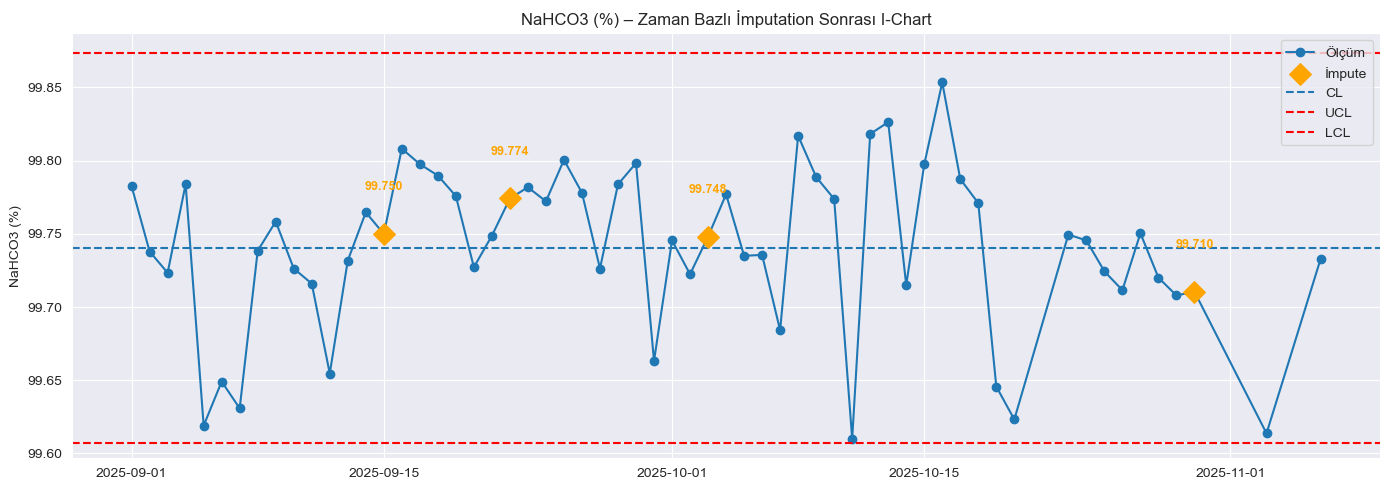

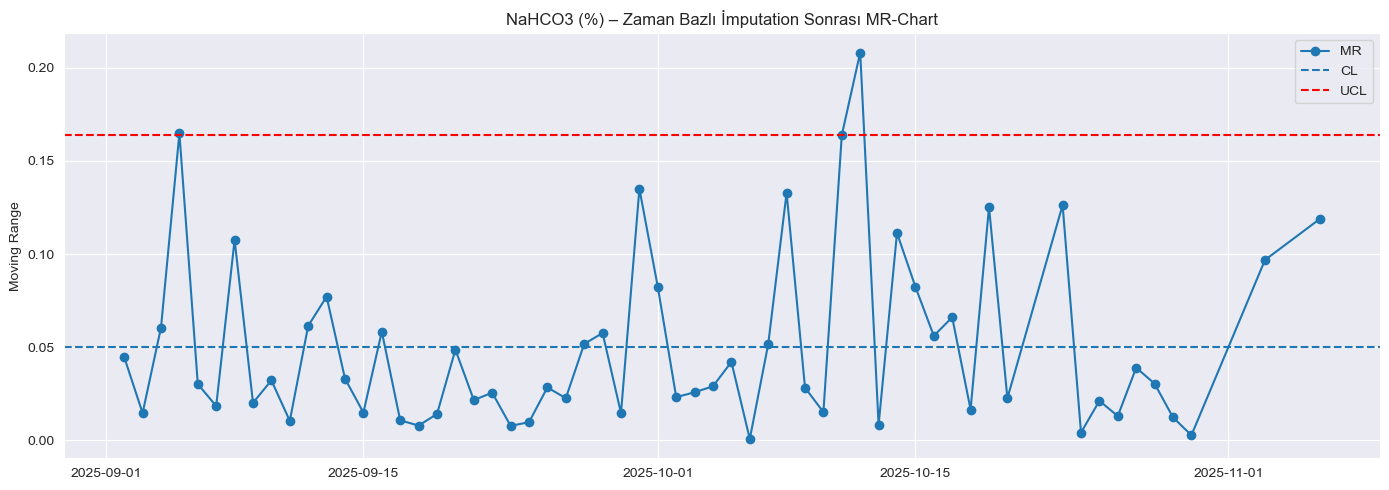

📊 İstatistikler:
{'mean': 99.74055263888889, 'sigma': 0.04442791601554781, 'UCL': 99.87383638693552, 'LCL': 99.60726889084225}


In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# =====================================================
# 1️⃣ Excel oku ve kolonları temizle
# =====================================================
df = pd.read_excel("60 günlük veriler.xlsx")
df.columns = df.columns.str.strip()

# =====================================================
# 2️⃣ Datetime oluştur (SADECE TARİH)
# =====================================================
df["Datetime"] = pd.to_datetime(df["Analiz Tarihi"], dayfirst=True)
df = df.sort_values("Datetime").reset_index(drop=True)

# =====================================================
# 3️⃣ İmpute edilecek tarihler
# =====================================================
impute_dates = pd.to_datetime([
    "2025-09-15",
    "2025-09-22",
    "2025-10-03",
    "2025-10-30"
])

df["imputed"] = df["Datetime"].isin(impute_dates)

# =====================================================
# 4️⃣ ZAMAN BAZLI IMPUTATION (±6 GÜN ORTALAMA)
# =====================================================
for idx in df[df["imputed"]].index:
    current_date = df.loc[idx, "Datetime"]

    window_mask = (
        (df["Datetime"] >= current_date - pd.Timedelta(days=6)) &
        (df["Datetime"] <= current_date + pd.Timedelta(days=6)) &
        (~df["imputed"])
    )

    mean_value = df.loc[window_mask, "NaHCO3 (%)"].mean()

    df.loc[idx, "NaHCO3 (%)"] = mean_value

# =====================================================
# 5️⃣ IMR CHART FONKSİYONU (IMPUTE NOKTALAR VURGULU)
# =====================================================
def imr_chart(df, value_col, date_col="Datetime", flag_col="imputed", title_prefix=""):
    x = df[value_col].values
    dates = df[date_col].values
    imputed_mask = df[flag_col].values

    # Moving Range
    MR = np.abs(np.diff(x))
    d2 = 1.128

    x_bar = np.mean(x)
    MR_bar = np.mean(MR)
    sigma = MR_bar / d2

    # I-Chart limits
    UCL_I = x_bar + 3 * sigma
    LCL_I = x_bar - 3 * sigma

    # MR-Chart limits
    UCL_MR = 3.267 * MR_bar

    # =========================
    # I-CHART
    # =========================
    plt.figure(figsize=(14,5))

    plt.plot(dates, x, marker="o", label="Ölçüm", zorder=2)

    # Impute edilen noktalar
    plt.scatter(
        dates[imputed_mask],
        x[imputed_mask],
        color="orange",
        marker="D",
        s=120,
        zorder=5,
        label="İmpute"
    )

    # Değer etiketleri
    for d, val in zip(dates[imputed_mask], x[imputed_mask]):
        plt.text(
            d,
            val + 0.03,
            f"{val:.3f}",
            color="orange",
            fontsize=9,
            ha="center",
            fontweight="bold"
        )

    plt.axhline(x_bar, linestyle="--", label="CL")
    plt.axhline(UCL_I, color="red", linestyle="--", label="UCL")
    plt.axhline(LCL_I, color="red", linestyle="--", label="LCL")

    plt.title(f"{title_prefix} I-Chart")
    plt.ylabel(value_col)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # =========================
    # MR-CHART
    # =========================
    plt.figure(figsize=(14,5))
    plt.plot(dates[1:], MR, marker="o", label="MR")

    plt.axhline(MR_bar, linestyle="--", label="CL")
    plt.axhline(UCL_MR, color="red", linestyle="--", label="UCL")

    plt.title(f"{title_prefix} MR-Chart")
    plt.ylabel("Moving Range")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    return {
        "mean": x_bar,
        "sigma": sigma,
        "UCL": UCL_I,
        "LCL": LCL_I
    }

# =====================================================
# 6️⃣ GRAFİKLERİ ÇİZ
# =====================================================
stats = imr_chart(
    df,
    value_col="NaHCO3 (%)",
    title_prefix="NaHCO3 (%) – Zaman Bazlı İmputation Sonrası"
)

print("📊 İstatistikler:")
print(stats)


In [52]:
def cp_cpk(mean, sigma, LSL=None, USL=None):
    Cp = None
    Cpk = None

    if sigma == 0:
        return None, None

    if LSL is not None and USL is not None:
        Cp = (USL - LSL) / (6 * sigma)
        Cpk = min(
            (USL - mean) / (3 * sigma),
            (mean - LSL) / (3 * sigma)
        )
    elif USL is not None:
        Cp = (USL - mean) / (3 * sigma)
        Cpk = Cp
    elif LSL is not None:
        Cp = (mean - LSL) / (3 * sigma)
        Cpk = Cp

    return Cp, Cpk


In [53]:
import numpy as np
import matplotlib.pyplot as plt

def draw_imr(df, value_col, title_suffix):
    x = df[value_col].dropna().values
    dates = df.loc[df[value_col].notna(), "Datetime"].values

    MR = np.abs(np.diff(x))
    d2 = 1.128

    x_bar = np.mean(x)
    MR_bar = np.mean(MR)
    sigma = MR_bar / d2 if MR_bar > 0 else 0

    UCL_I = x_bar + 3 * sigma
    LCL_I = x_bar - 3 * sigma
    UCL_MR = 3.267 * MR_bar

    # I-CHART
    plt.figure(figsize=(14,4))
    plt.plot(dates, x, marker="o")
    plt.axhline(x_bar, linestyle="--", label="CL")
    plt.axhline(UCL_I, color="red", linestyle="--", label="UCL")
    plt.axhline(LCL_I, color="red", linestyle="--", label="LCL")
    plt.title(f"{value_col} – I-Chart ({title_suffix})")
    plt.ylabel(value_col)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # MR-CHART
    plt.figure(figsize=(14,4))
    plt.plot(dates[1:], MR, marker="o")
    plt.axhline(MR_bar, linestyle="--", label="CL")
    plt.axhline(UCL_MR, color="red", linestyle="--", label="UCL")
    plt.title(f"{value_col} – MR-Chart ({title_suffix})")
    plt.ylabel("Moving Range")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    return {
        "mean": x_bar,
        "sigma": sigma
    }


In [58]:
PARAMETERS = {
    "NaHCO3 (%)": {"LSL": 99.6, "USL": 99.9},
    "Na2CO3 (%)": {"LSL": 0.05, "USL": 0.20},
    "Cl- (mg/kg)": {"USL": 300},
    "SO42-(mg/kg)": {"USL": 350},
    "SÇM (mg/kg)": {"USL": 500},
    "Nem (%)": {"USL": 0.05},
    "Yığın Yoğunluğu (g/cm3)": {"LSL": 1.05, "USL": 1.25}
}


In [59]:
print(df.columns.tolist())


['Doküman', 'Analiz Tarihi', 'Numune Adı', 'NaHCO3 (%)', 'Na2CO3 (%)', 'Cl- (mg/kg)', 'SO42-(mg/kg)', 'SÇM (mg/kg)', 'Yığın Yoğunluğu (g/cm3)', 'Tane Boyutu m250µm(g) Ortalama', 'Nem (%)', 'Datetime', 'imputed']


BURANIN ALTINI İNCEELE



PARAMETRE: NaHCO3 (%)


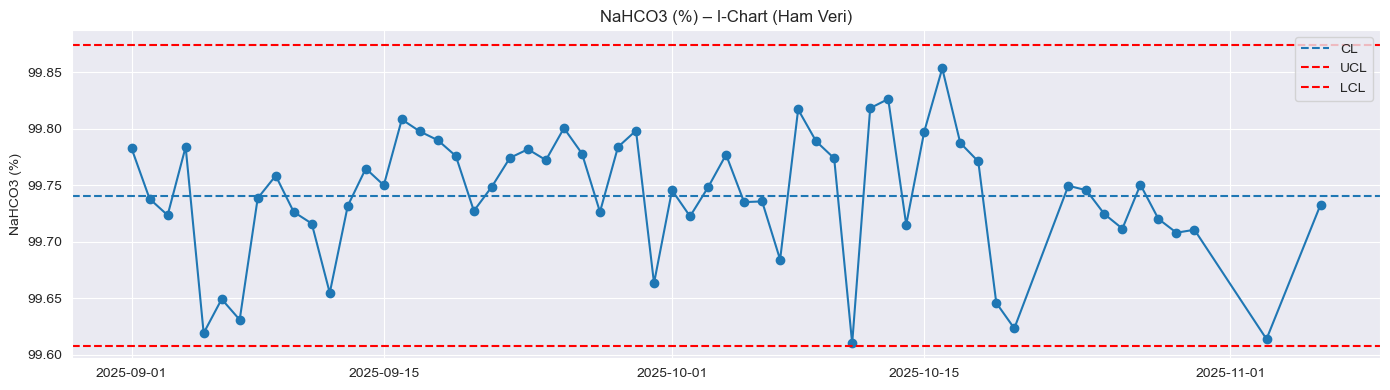

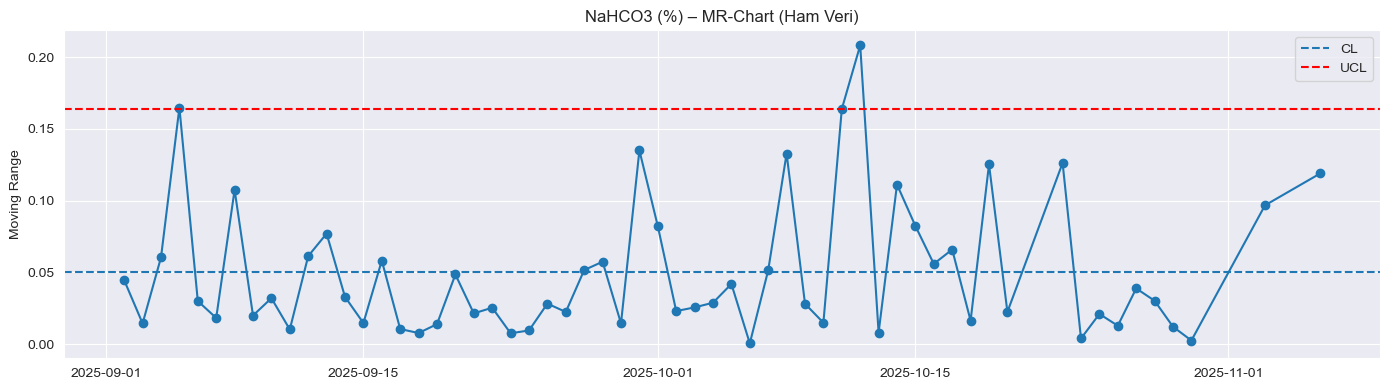

HAM VERİ → Mean: 99.7406 Sigma: 0.0444 Cp: 1.1254185315040233 Cpk: 1.054536963048971


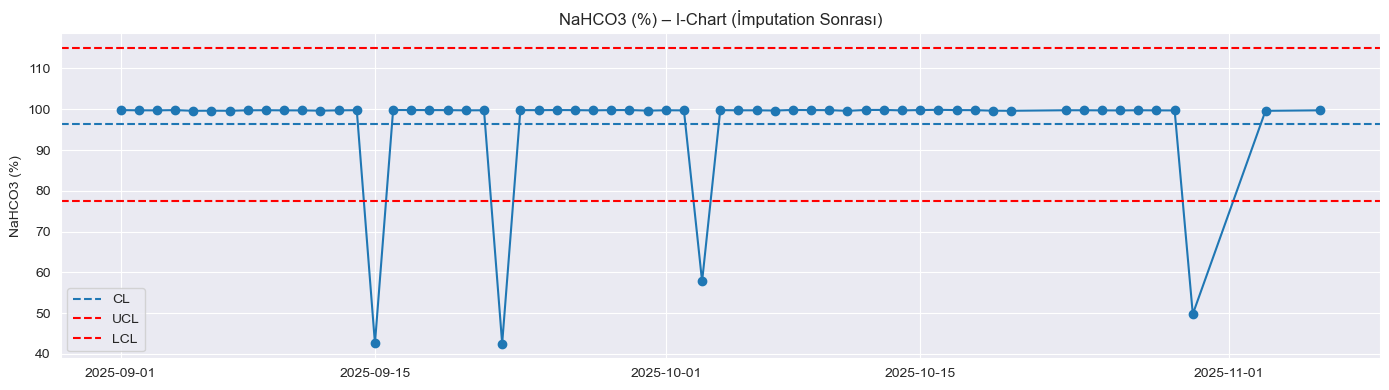

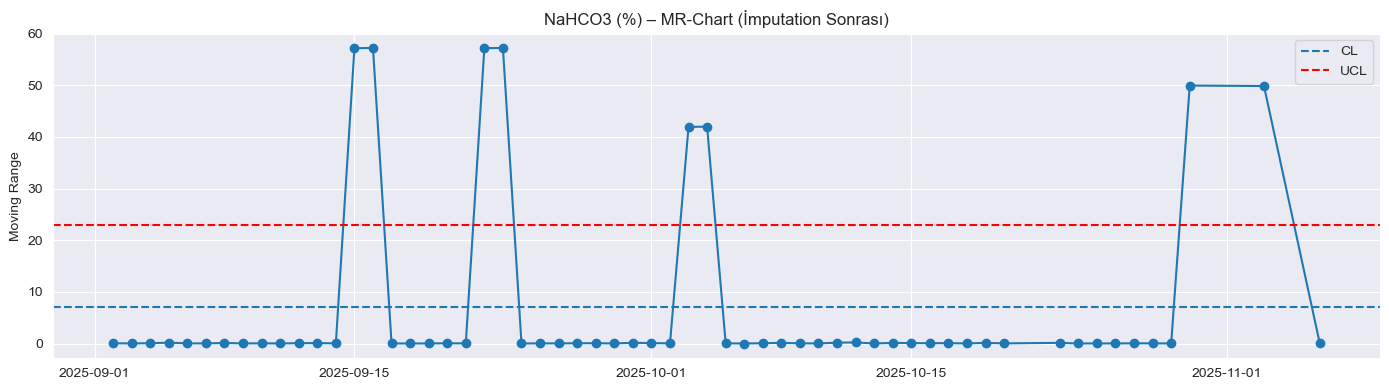

IMPUTE → Mean: 96.3029 Sigma: 6.2383 Cp: 0.008014964349835816 Cpk: -0.17617399255347196

PARAMETRE: Na2CO3 (%)


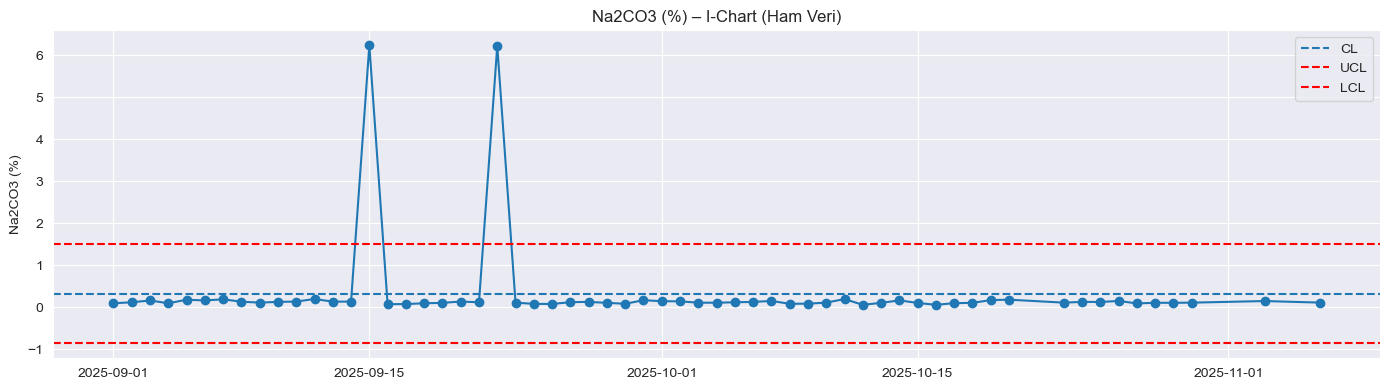

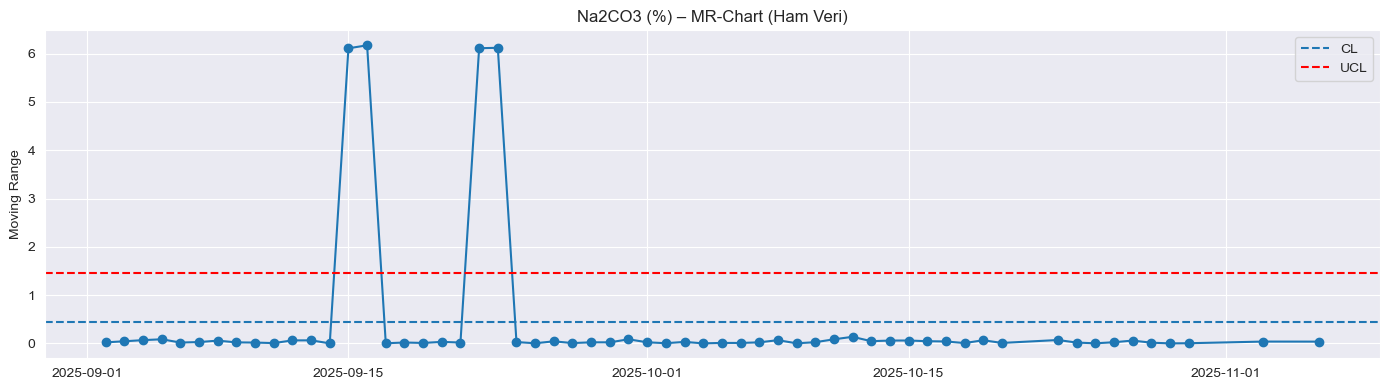

HAM VERİ → Mean: 0.322 Sigma: 0.3956 Cp: 0.06319603761831691 Cpk: -0.10279888785912887


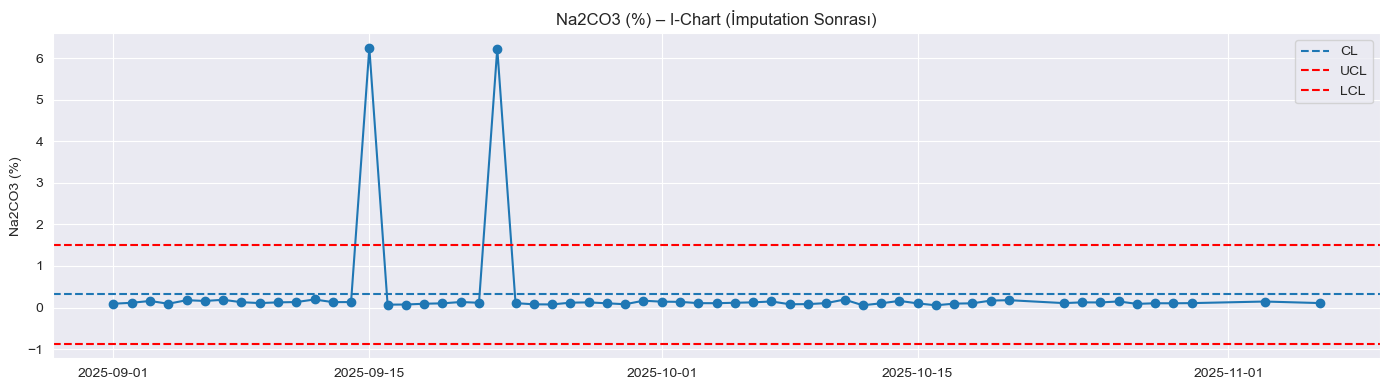

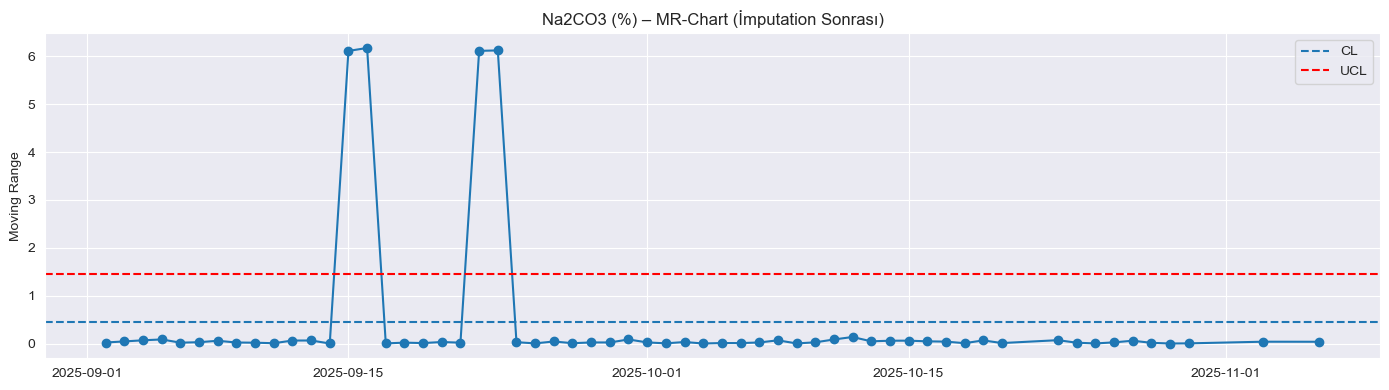

IMPUTE → Mean: 0.322 Sigma: 0.3956 Cp: 0.06319603761831691 Cpk: -0.10279888785912887

PARAMETRE: Cl- (mg/kg)


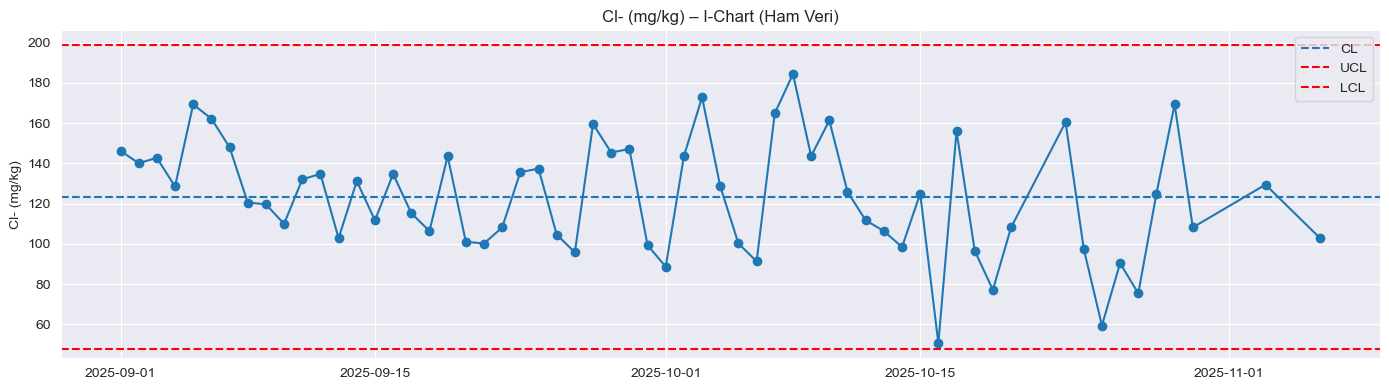

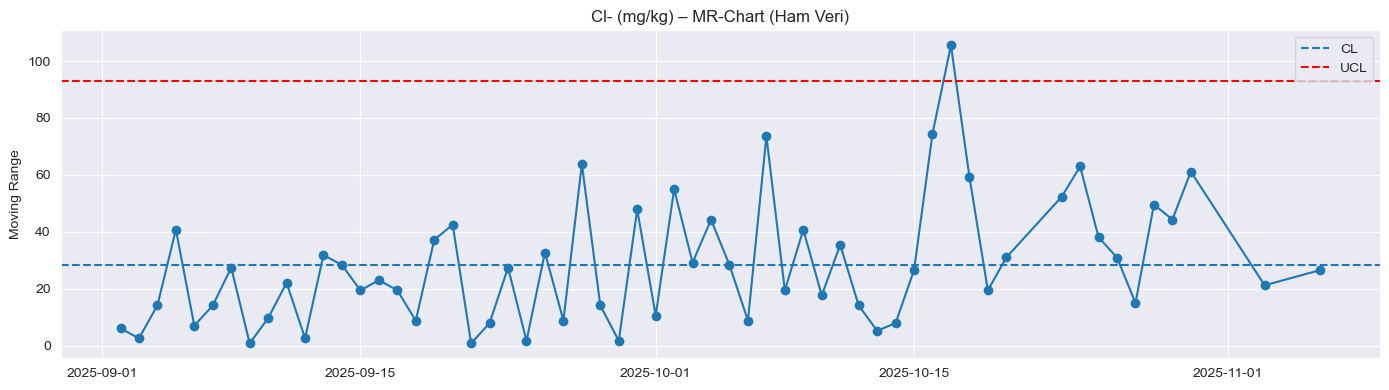

HAM VERİ → Mean: 123.1379 Sigma: 25.1936 Cp: 2.3400374828282295 Cpk: 2.3400374828282295


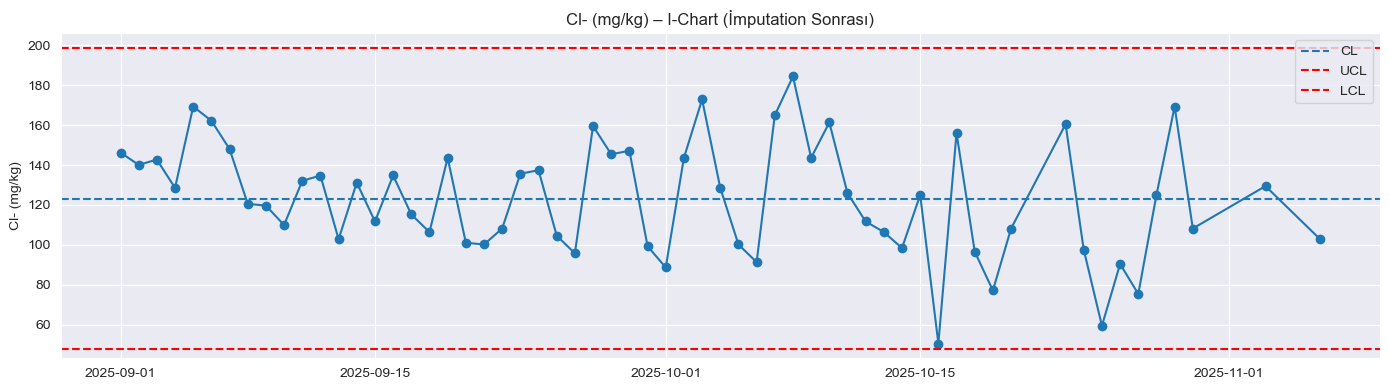

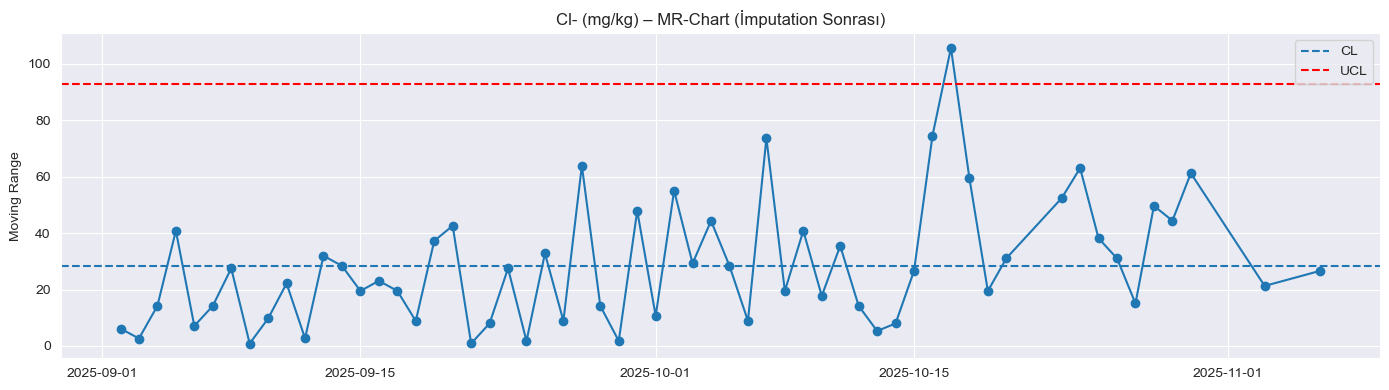

IMPUTE → Mean: 123.1379 Sigma: 25.1936 Cp: 2.3400374828282295 Cpk: 2.3400374828282295

PARAMETRE: SO42-(mg/kg)


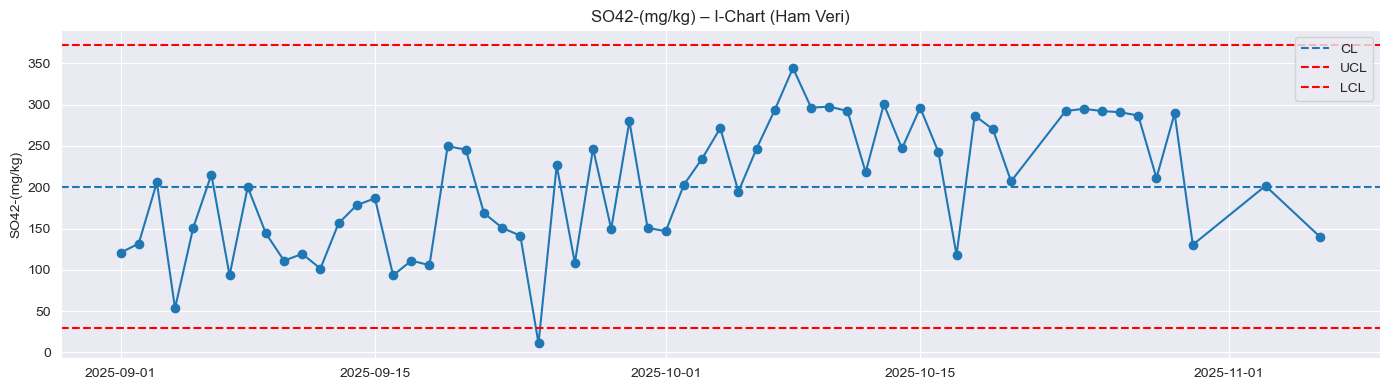

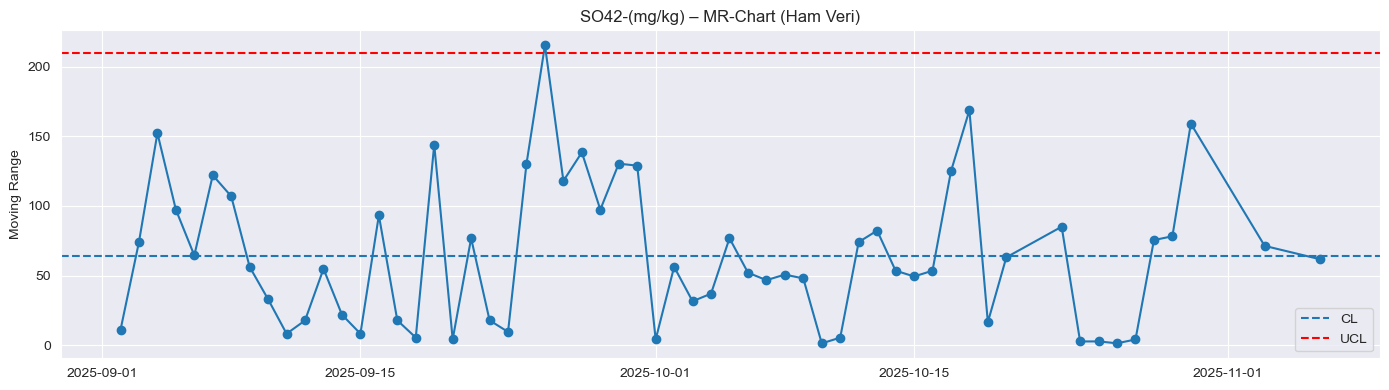

HAM VERİ → Mean: 200.7047 Sigma: 57.0019 Cp: 0.8730433023516658 Cpk: 0.8730433023516658


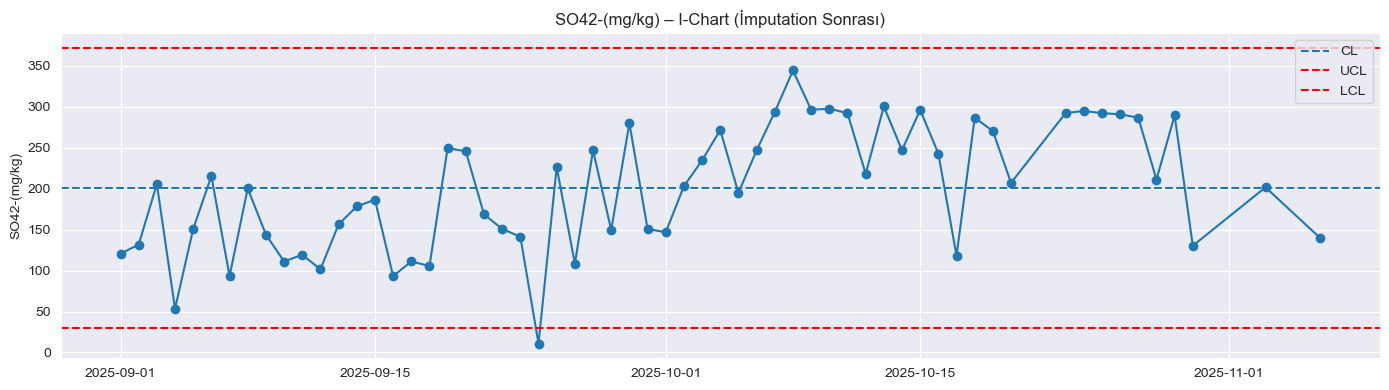

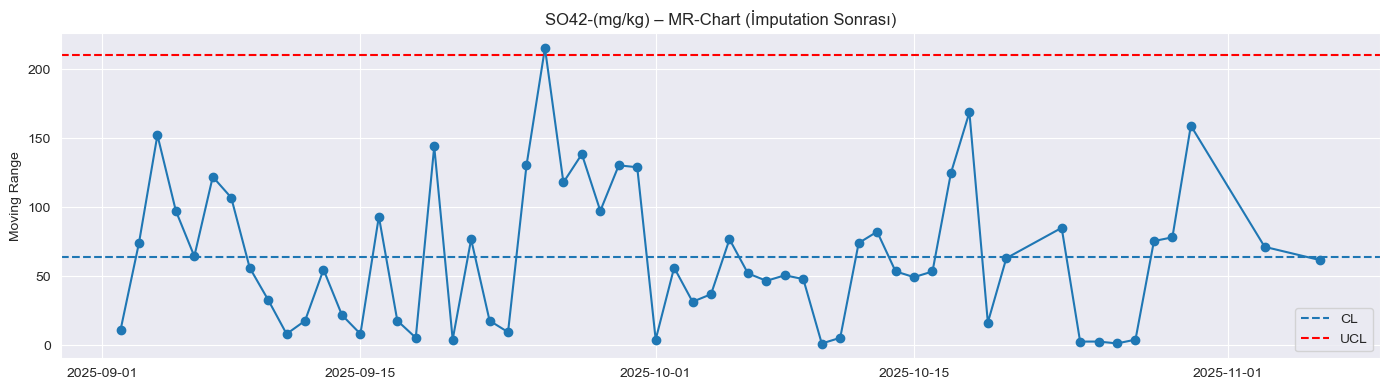

IMPUTE → Mean: 200.7047 Sigma: 57.0019 Cp: 0.8730433023516658 Cpk: 0.8730433023516658

PARAMETRE: SÇM (mg/kg)


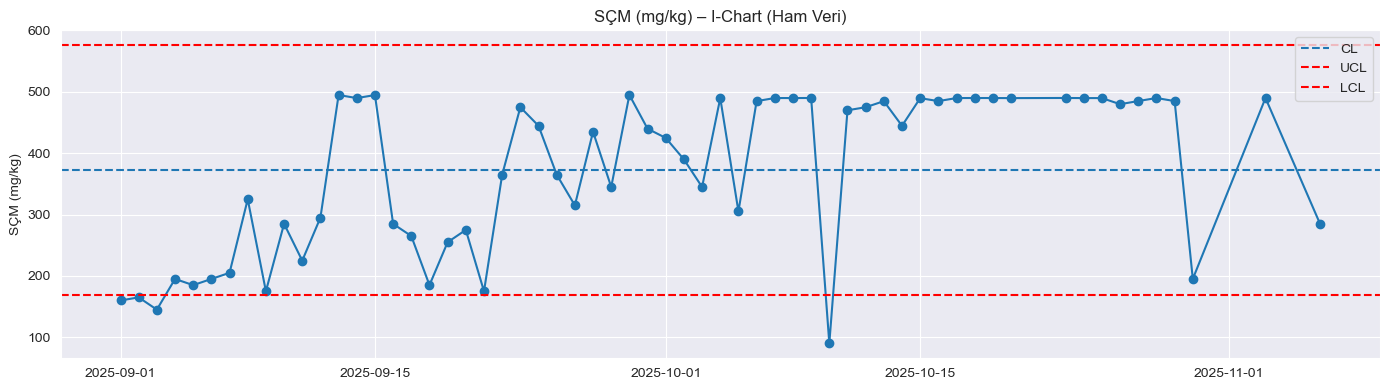

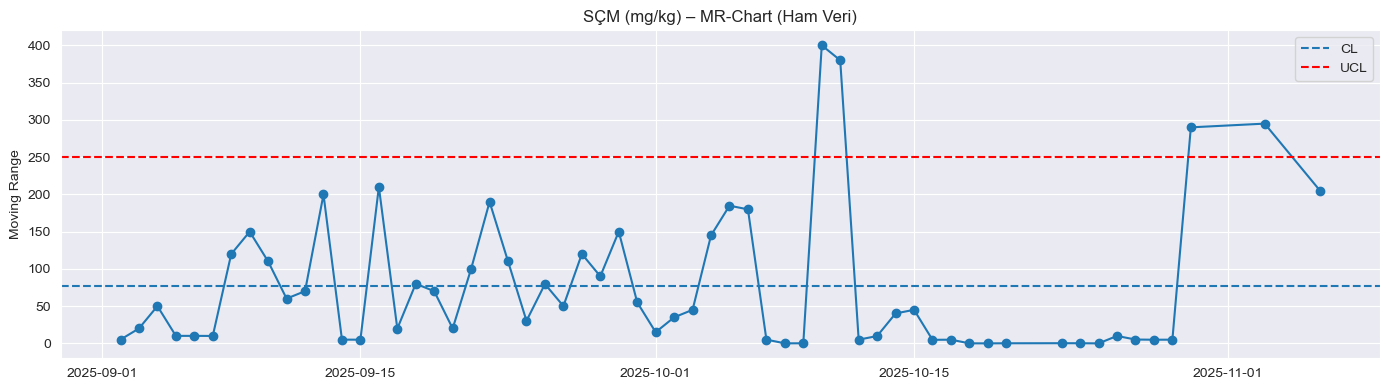

HAM VERİ → Mean: 372.3025 Sigma: 67.8419 Cp: 0.6274271547285879 Cpk: 0.6274271547285879


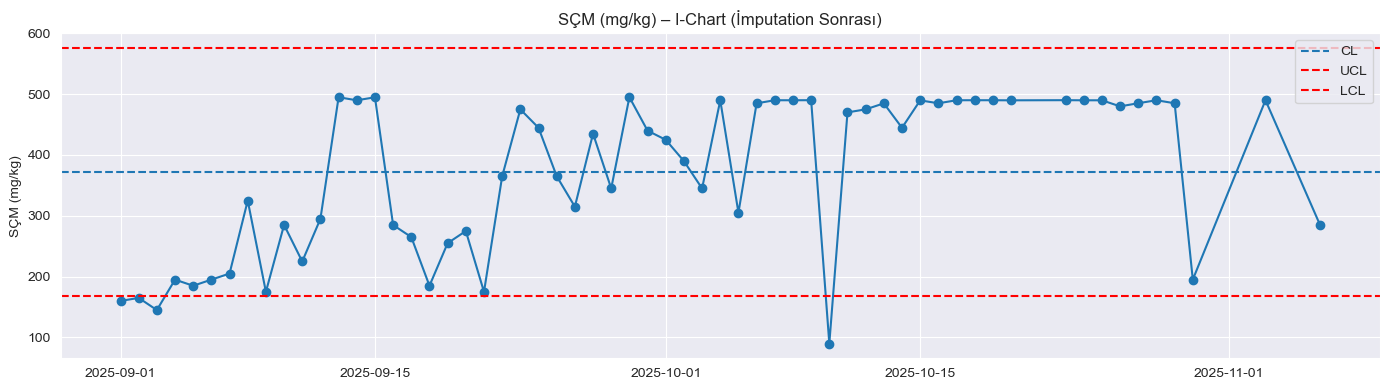

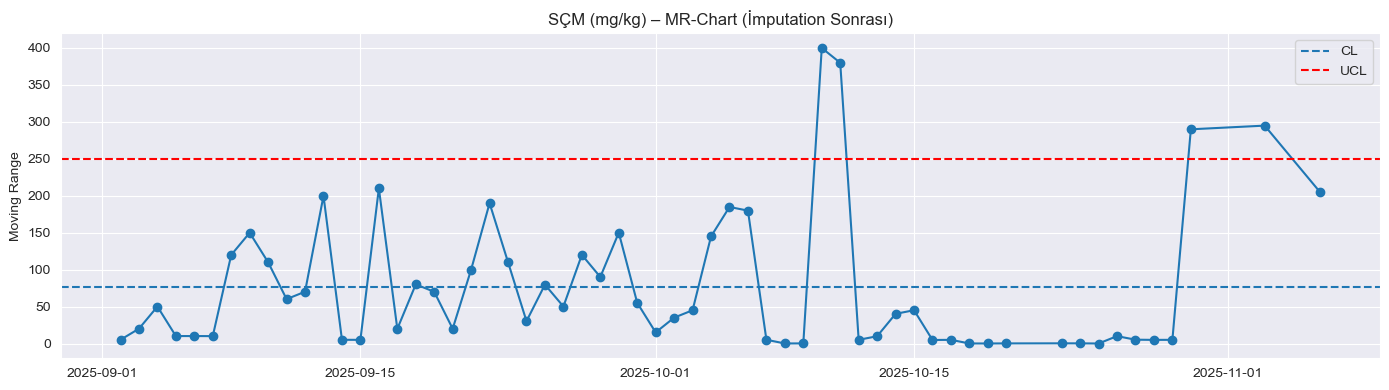

IMPUTE → Mean: 372.3025 Sigma: 67.8419 Cp: 0.6274271547285879 Cpk: 0.6274271547285879

PARAMETRE: Nem (%)


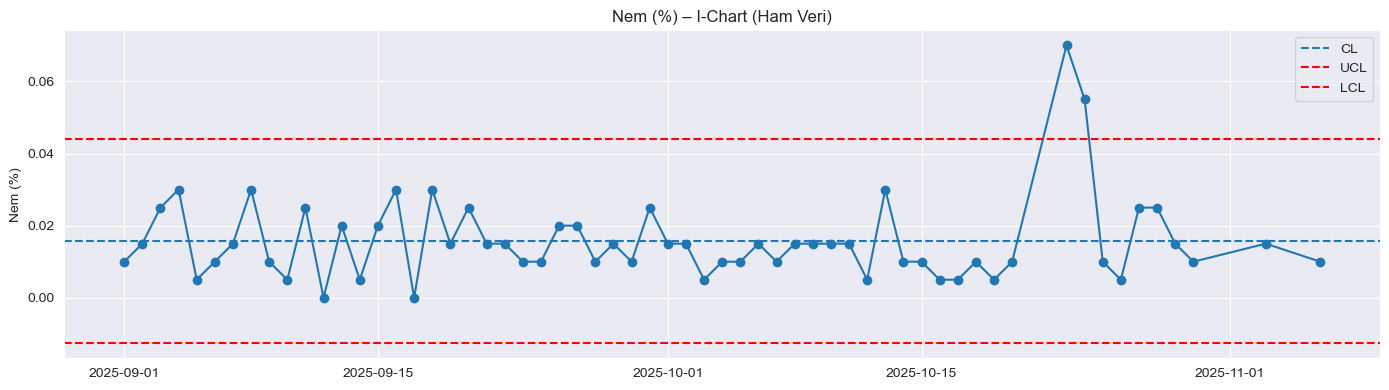

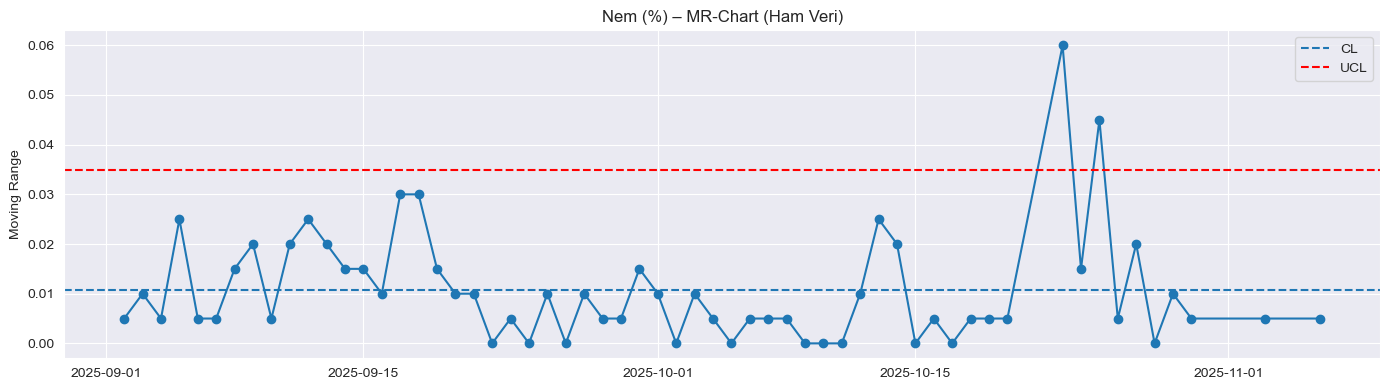

HAM VERİ → Mean: 0.0158 Sigma: 0.0095 Cp: 1.2060349206349206 Cpk: 1.2060349206349206


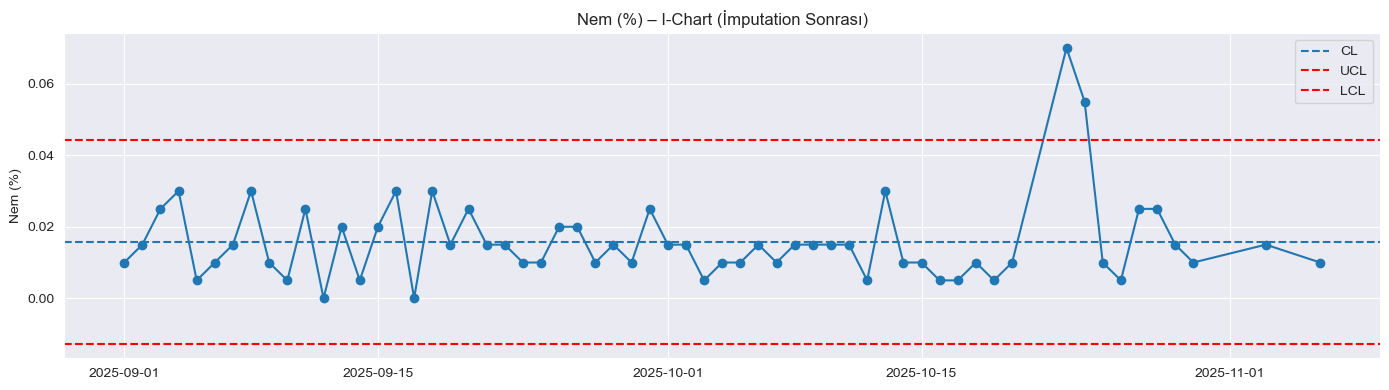

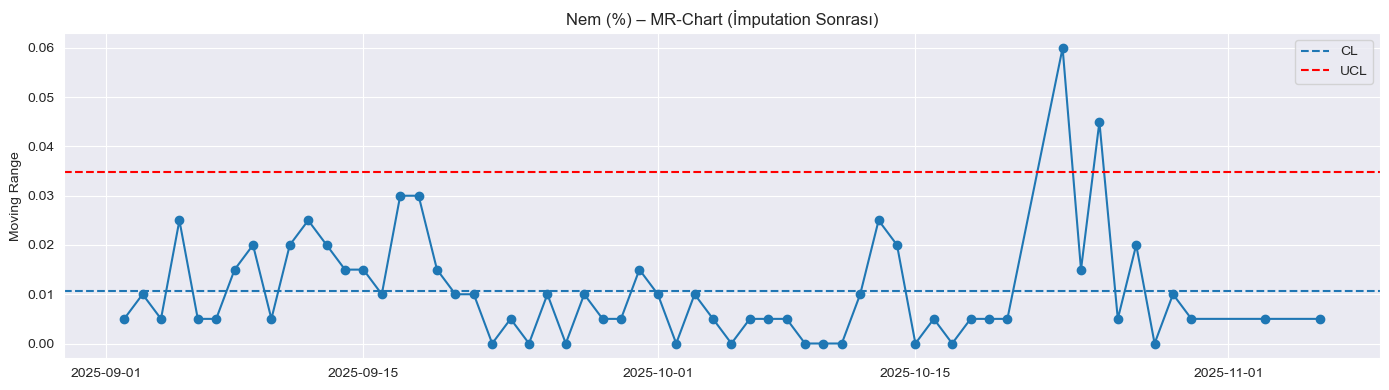

IMPUTE → Mean: 0.0158 Sigma: 0.0095 Cp: 1.2060349206349206 Cpk: 1.2060349206349206

PARAMETRE: Yığın Yoğunluğu (g/cm3)


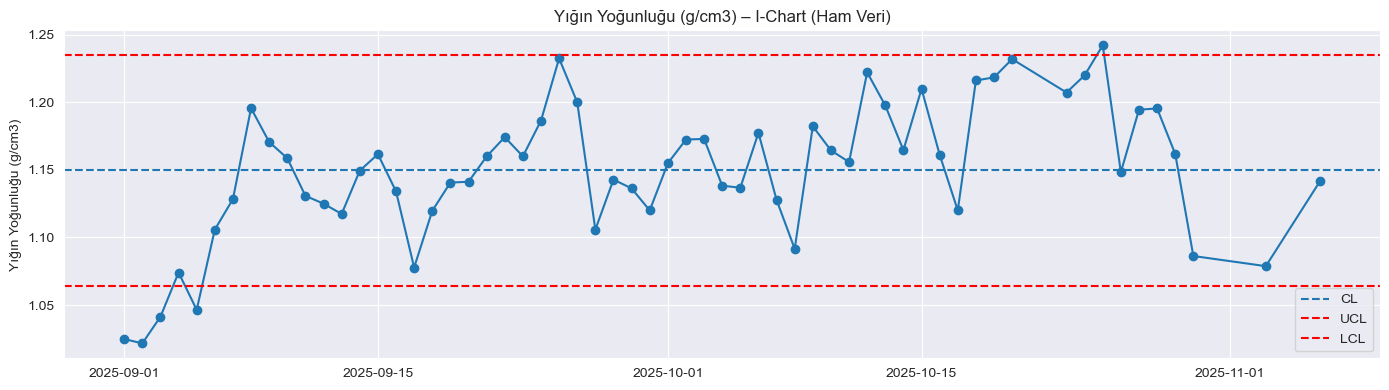

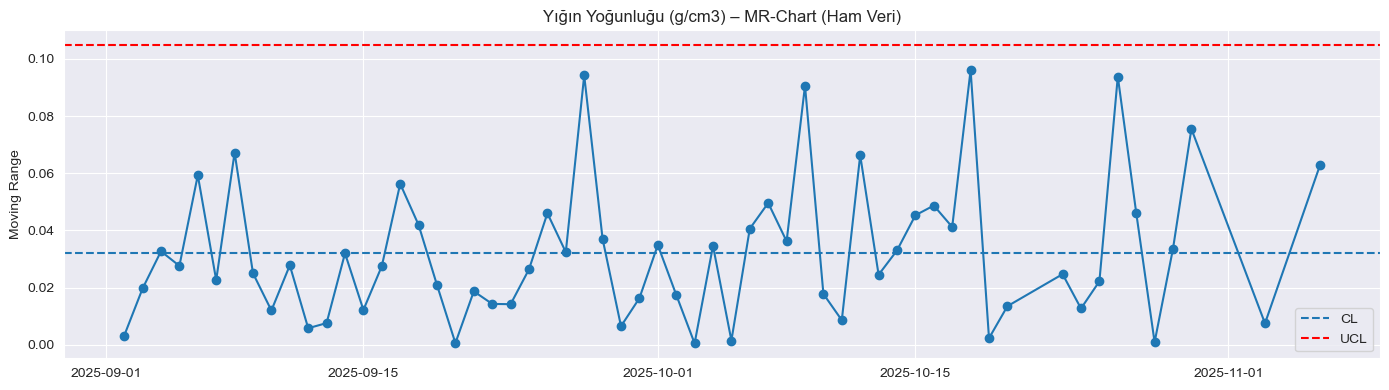

HAM VERİ → Mean: 1.1496 Sigma: 0.0284 Cp: 1.1729498228731563 Cpk: 1.1681407285993748


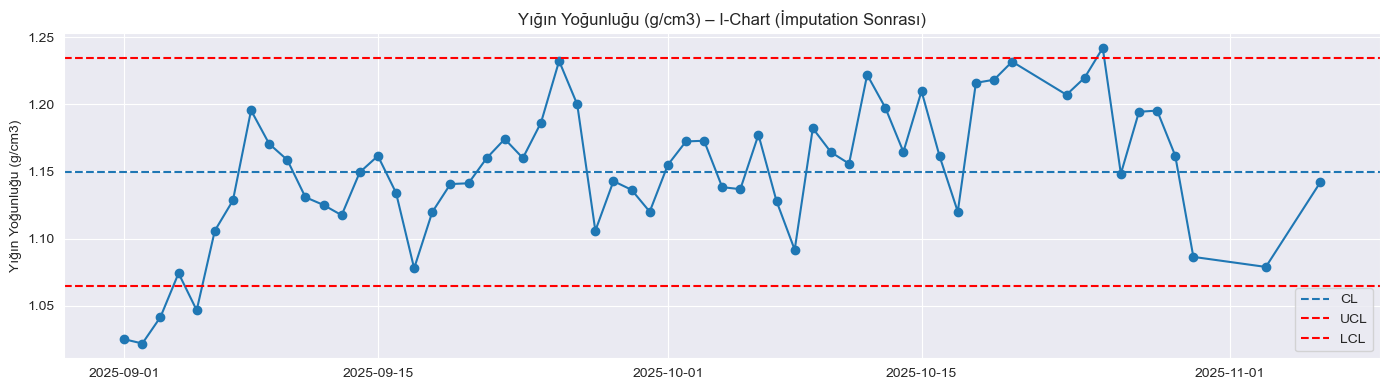

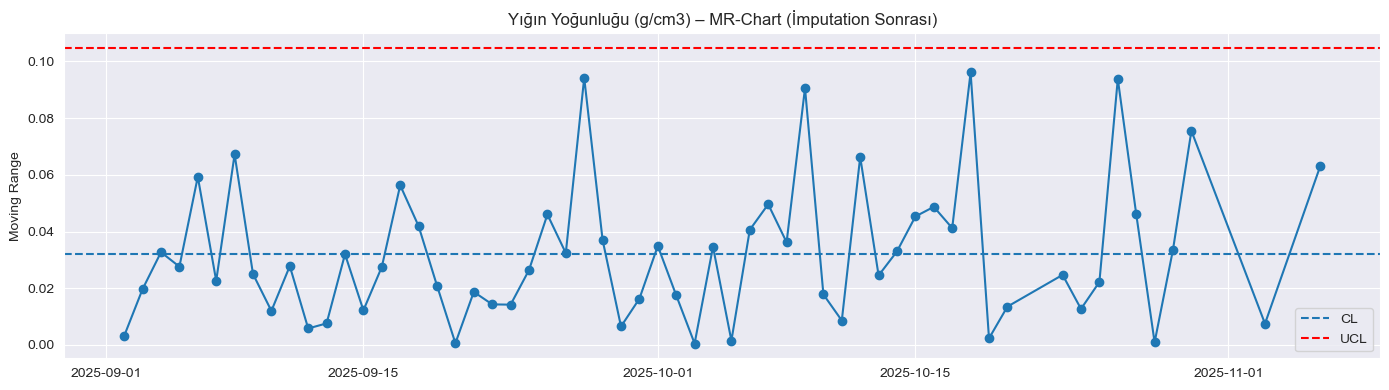

IMPUTE → Mean: 1.1496 Sigma: 0.0284 Cp: 1.1729498228731563 Cpk: 1.1681407285993748


In [60]:
for param, limits in PARAMETERS.items():
    print("\n" + "="*60)
    print("PARAMETRE:", param)
    print("="*60)

    # HAM VERİ
    stats_raw = draw_imr(df, param, "Ham Veri")
    Cp_raw, Cpk_raw = cp_cpk(
        stats_raw["mean"],
        stats_raw["sigma"],
        LSL=limits.get("LSL"),
        USL=limits.get("USL")
    )

    print("HAM VERİ → Mean:", round(stats_raw["mean"],4),
          "Sigma:", round(stats_raw["sigma"],4),
          "Cp:", Cp_raw,
          "Cpk:", Cpk_raw)

    # IMPUTATION SONRASI
    stats_clean = draw_imr(df_clean, param, "İmputation Sonrası")
    Cp_clean, Cpk_clean = cp_cpk(
        stats_clean["mean"],
        stats_clean["sigma"],
        LSL=limits.get("LSL"),
        USL=limits.get("USL")
    )

    print("IMPUTE → Mean:", round(stats_clean["mean"],4),
          "Sigma:", round(stats_clean["sigma"],4),
          "Cp:", Cp_clean,
          "Cpk:", Cpk_clean)
